<a href="https://colab.research.google.com/github/chandan2602/AI-Generated-Imagery-with-Stable-Diffusion/blob/main/Text_to_Image_Generation_Using_Stable_Diffusion_and_Diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
prompt = """A serene and whimsical scene of a girl dreaming, lying on a soft grassy hill under a starry night sky. Her hair flows gently in the breeze, blending with glowing magical particles.
 The sky is filled with constellations and faint auroras, creating an ethereal atmosphere.
Surrounding her are softly glowing flowers and tiny fireflies, adding to the dreamlike setting. The overall mood is peaceful and imaginative, with a touch of magic and wonder
"""

In [13]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (88 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['peaceful and imaginative , with a touch of magic and wonder']


  0%|          | 0/50 [00:00<?, ?it/s]

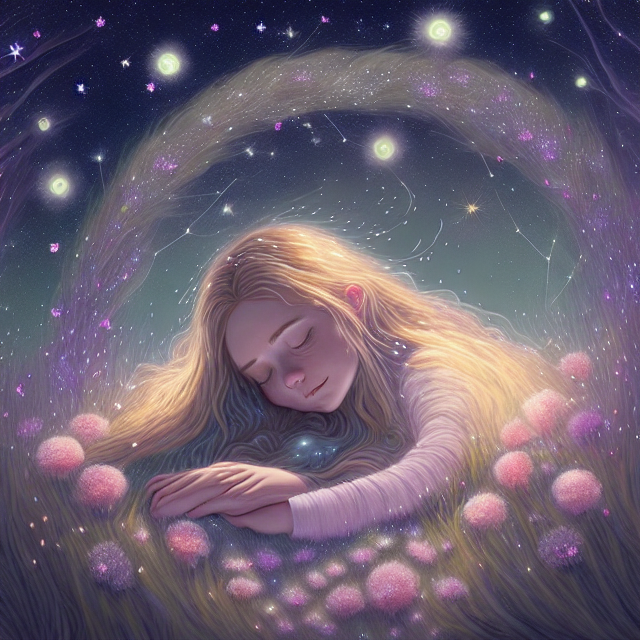

In [14]:
image

In [7]:
prompt2 = "An ancient Greek battlefield with warriors in bronze armor, shields, and spears, set against a rugged landscape with ruins and stormy skies, capturing intense combat and mythic heroism."

In [10]:
image2 = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

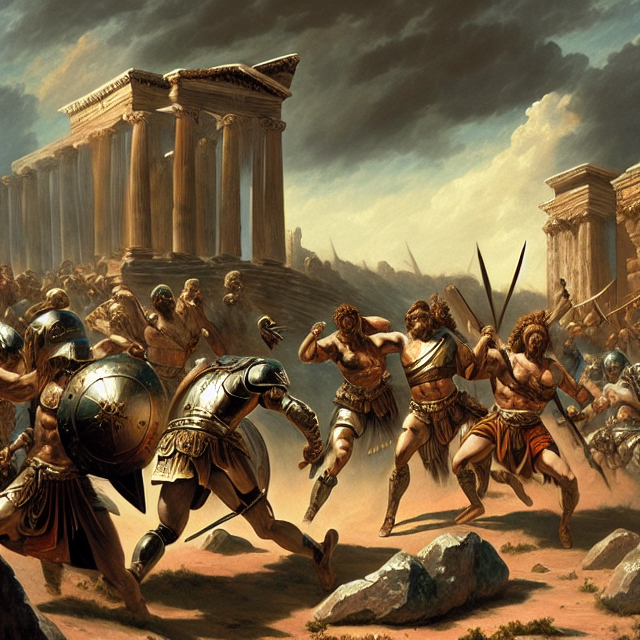

In [11]:
image2

In [15]:

def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [27]:
prompt3 = """reate a high-intensity futuristic warzone scene, set in a desolate city with towering, crumbling skyscrapers.
The sky is filled with dark clouds and smoke from ongoing combat, while distant explosions light up the horizon.
 Advanced military vehicles, such as heavily armored drones and ground mechs, are engaged in battle. Soldiers in sleek, high-tech armor are fighting, with some using futuristic weapons like energy rifles.
 There are glowing neon signs, broken streets with debris, and a mixture of urban and military elements.
The scene has a dystopian, cyberpunk vibe, with a cold, harsh atmosphere and neon highlights in the chaos."""
params = {}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fighting , with some using futuristic weapons like energy rifles . there are glowing neon signs , broken streets with debris , and a mixture of urban and military elements . the scene has a dystopian , cyberpunk vibe , with a cold , harsh atmosphere and neon highlights in the chaos .']


  0%|          | 0/50 [00:00<?, ?it/s]

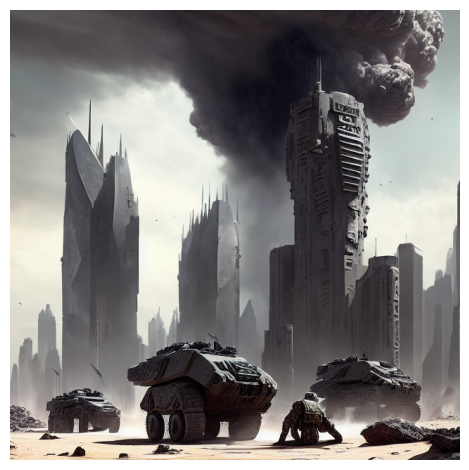

In [28]:
generate_image(pipe, prompt3, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fighting , with some using futuristic weapons like energy rifles . there are glowing neon signs , broken streets with debris , and a mixture of urban and military elements . the scene has a dystopian , cyberpunk vibe , with a cold , harsh atmosphere and neon highlights in the chaos .']


  0%|          | 0/100 [00:00<?, ?it/s]

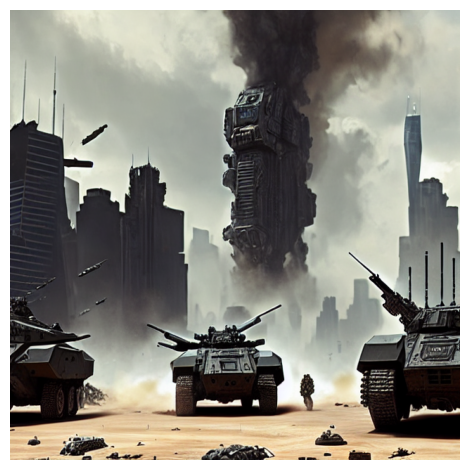

In [30]:
params = {'num_inference_steps': 100}
generate_image(pipe, prompt3, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fighting , with some using futuristic weapons like energy rifles . there are glowing neon signs , broken streets with debris , and a mixture of urban and military elements . the scene has a dystopian , cyberpunk vibe , with a cold , harsh atmosphere and neon highlights in the chaos .']


  0%|          | 0/100 [00:00<?, ?it/s]

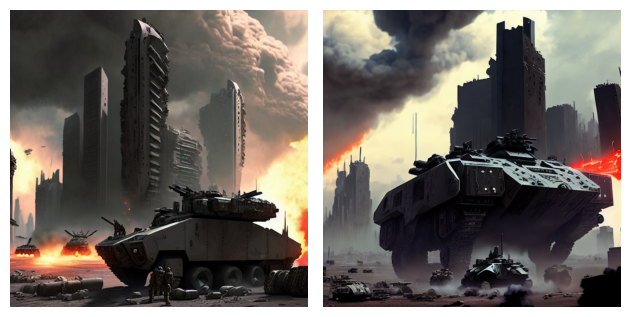

In [31]:

#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt3, params)